### TIENDA COSMETICA MEJORADO
#### PySpark
Este proyecto tanta de realizar consultas sobre 2GB de datos de una tienda de cosmetica en el que se han realizado una serie de compras por sus clientes desde Octubre hasta Febrero. Contiene **20.692.840** de datos.  Vamos a realizar consultas sobre que productos se han comprando en grandes cantidades en nuestra tienda para poder hacer sugerencias para marketing digital o bussines inteligence.

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import asc
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.appName('Ejemplo.com').getOrCreate()

In [4]:
df2 = spark.read.options(header='True', inferSchema='True').csv('C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/*.csv')

In [5]:
productos = df2.select('product_id').filter("event_type='purchase'")

In [6]:
grupos = productos.groupBy("product_id").count()

In [7]:
grupos = grupos.select(["product_id", "count"]).filter("count > 1800")

In [8]:
gruposMax1800 = grupos.sort(desc("count")).orderBy("product_id")

In [9]:
gruposMax1800.show()

+----------+-----+
|product_id|count|
+----------+-----+
|      5013| 1842|
|      5304| 3134|
|   5528035| 1847|
|   5686925| 2360|
|   5700037| 3684|
|   5751383| 2948|
|   5751422| 3521|
|   5792800| 2711|
|   5802432| 3533|
|   5809910| 7549|
|   5809911| 1827|
|   5809912| 3307|
|   5815662| 3246|
|   5816170| 1802|
|   5833330| 1829|
|   5843836| 1823|
|   5849033| 2782|
|   5854897| 4631|
+----------+-----+



 ### Automatizamos el proceso de las consultas
Como ya conozco los comandos para hacer una consulta correcta sobre un producto ahora automatizo el proceso para ahorrar código y que sea más eficiente nuestro algoritmo. De modo que he creado un diccionario que alojara solamente las id de los productos que tengan más de 1800 ventas y con el cual accederé para que cambie el valor del id en nuestro bucle for para la consulta. Luego los agrupa por las veces que hayan sido conteados/comprados en un dia y escribe un archivo csv que posteriormente sera analizado en PowerBI.

In [10]:
import pandas as pd
path = "C:/Users/USUARIO/Desktop/Prueba/"

In [11]:
dict = {}
maximo = gruposMax1800.select('product_id').count()
for i in range(maximo):
    dict[i] = gruposMax1800.collect()[i][0]
print(dict)

{0: 5013, 1: 5304, 2: 5528035, 3: 5686925, 4: 5700037, 5: 5751383, 6: 5751422, 7: 5792800, 8: 5802432, 9: 5809910, 10: 5809911, 11: 5809912, 12: 5815662, 13: 5816170, 14: 5833330, 15: 5843836, 16: 5849033, 17: 5854897}


In [26]:
for idproducto in dict.values():
    productoid   = df2.select("event_time","price").filter((col("product_id") == idproducto) & (col("event_type") == 'purchase' ))
    productoid_2 = productoid.withColumn("event_time", to_date("event_time"))
    productoid_3 = productoid_2.groupBy("event_time").count()
    productoid_3.toPandas().to_csv( path + "Prod"+ str(idproducto) + ".csv", header=True)

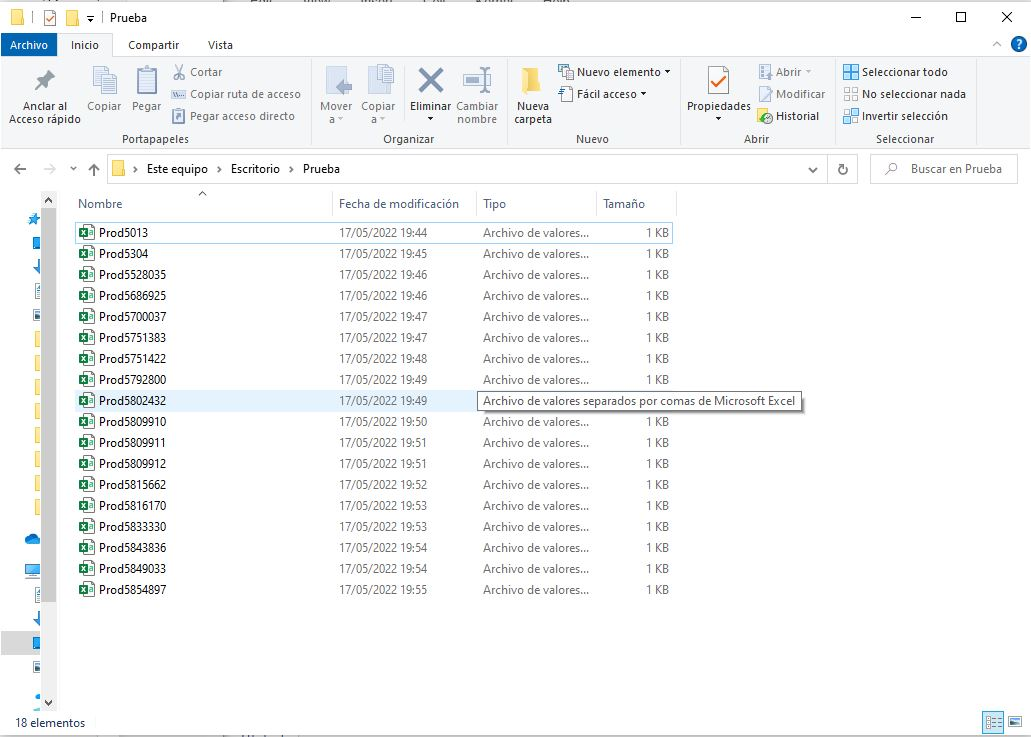

In [13]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/Ventas/ExploradorPrueba.jpg")

### POWER BI
A continuación podemos visualizar las ventas de los productos **5013 y 5304** donde se puede apreciar sus graficas por días, meses y años respecto a las ventas. Esto es muy útil para realizar un análisis para marketing digital.

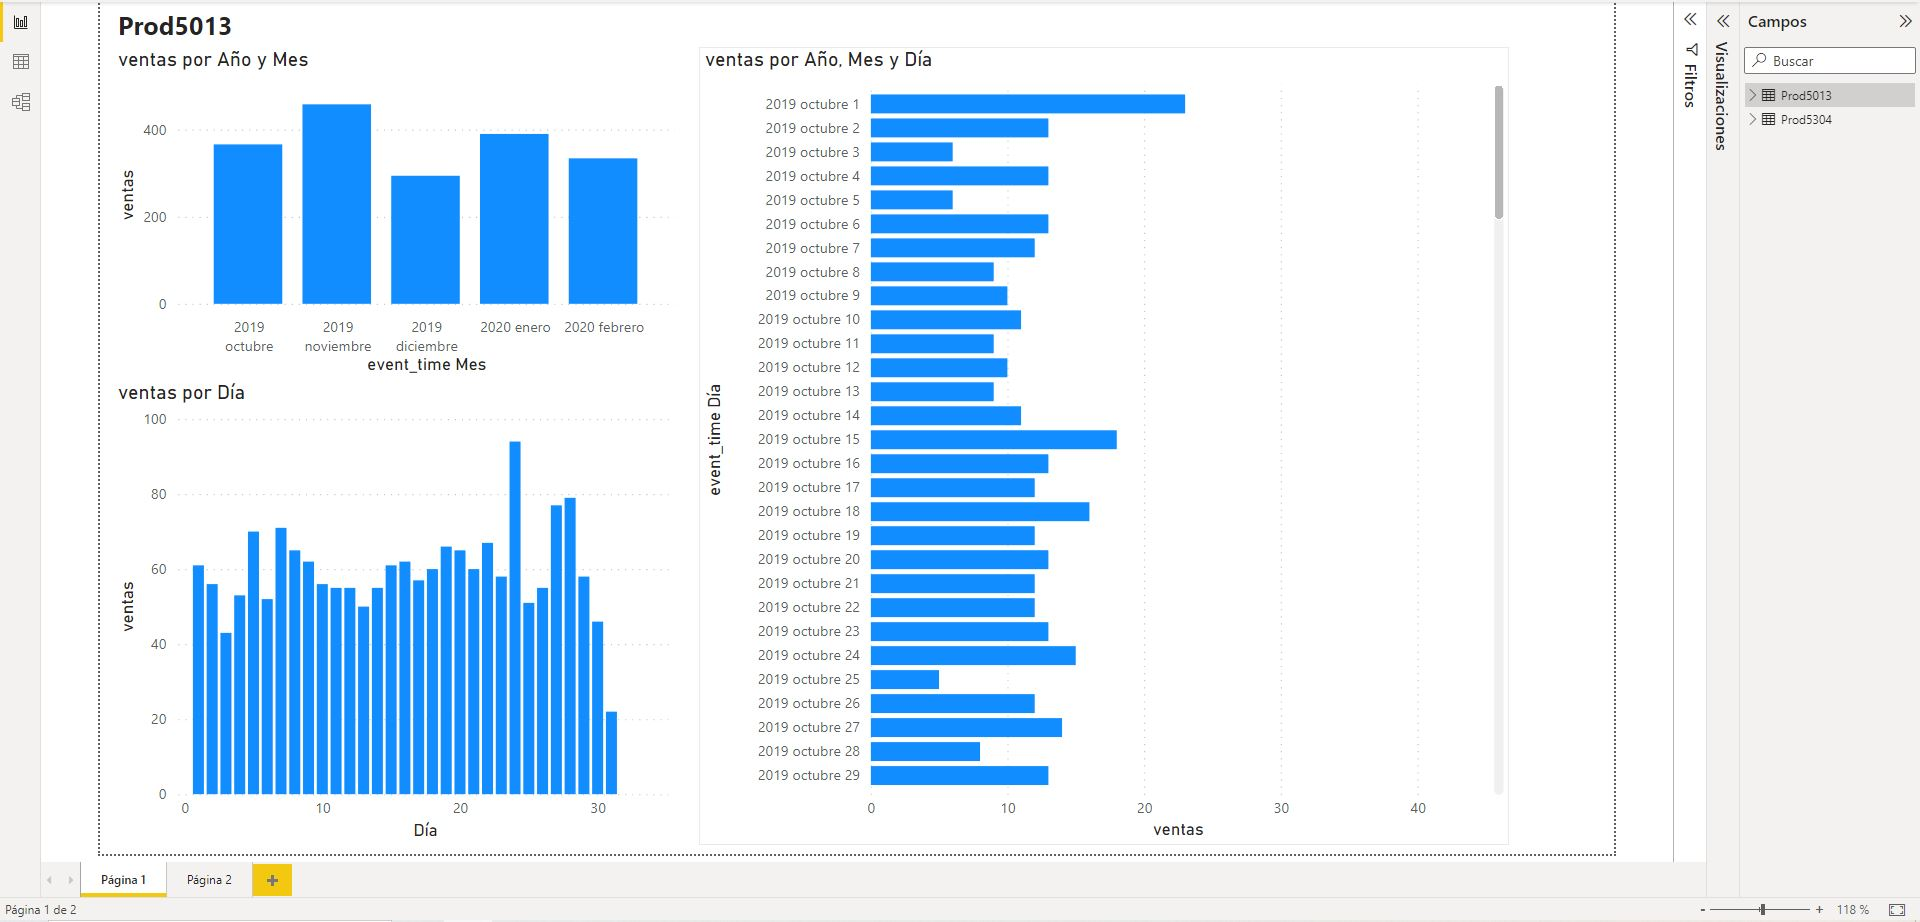

In [4]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/Ventas/Prueba/Prod5013.jpg")

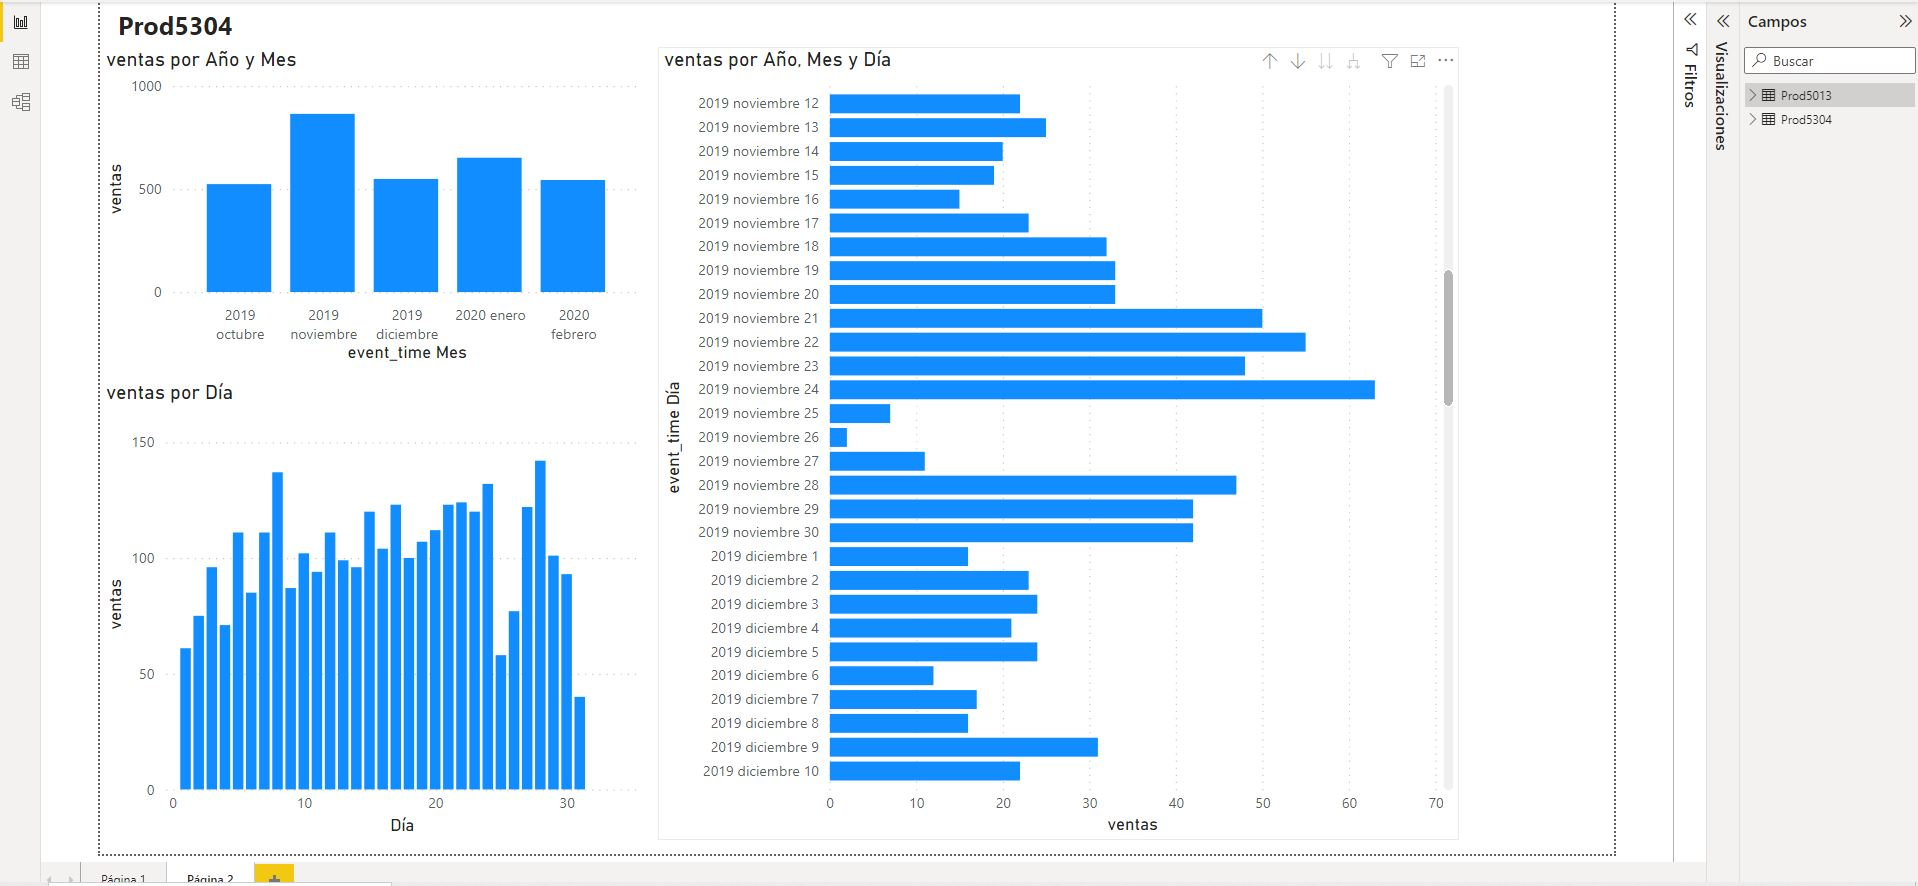

In [5]:
Image("C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/Ventas/Prueba/Prod5304.jpg")